In [1]:
 import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt 

In [8]:
from tensorflow.keras.models import Model

In [9]:
from tensorflow.keras.layers import Input,Flatten,Dense

In [10]:
from tensorflow.keras.datasets import cifar10

In [11]:
namelist=["Aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
namelist

['Aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [17]:
X_train.max()

255

In [18]:
X_train.min()

0

In [19]:
X_train_scale=X_train/255.0

In [20]:
X_test_scale=X_test/255.0

In [21]:
X_train_scale.max()

1.0

In [22]:
X_train_scale.min()

0.0

In [23]:
X_test_scale.max()

1.0

In [24]:
X_test_scale.min()

0.0

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
X_train_scale.shape

(50000, 32, 32, 3)

In [27]:
feed=Input(shape=(32,32,3))

In [28]:
feed

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_1')>

In [29]:
flat=Flatten()(feed)

In [30]:
flat

<KerasTensor: shape=(None, 3072) dtype=float32 (created by layer 'flatten')>

In [31]:
den1=Dense(units=256,activation="relu")(flat)

In [32]:
den1

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>

In [33]:
den2=Dense(units=128,activation="relu")(den1)

In [34]:
den2

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_1')>

In [35]:
den3=Dense(units=64,activation="relu")(den2)

In [36]:
den3

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_2')>

In [37]:
den4=Dense(units=128,activation="relu")(den3)

In [38]:
den4

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_3')>

In [40]:
den5=Dense(units=256,activation="relu")(den4)

In [41]:
den5

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_5')>

In [42]:
out=Dense(units=10,activation="softmax")(den5)

In [43]:
out

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_6')>

In [45]:
fun_model=Model(inputs=feed,outputs=out)

In [46]:
fun_model

In [47]:
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024 

In [48]:
fun_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

In [50]:
fun_model.fit(X_train_scale,y_train,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2911 - accuracy: 0.5345
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2824 - accuracy: 0.5371
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2708 - accuracy: 0.5435
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2620 - accuracy: 0.5427
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2523 - accuracy: 0.5466
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2402 - accuracy: 0.5511
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2292 - accuracy: 0.5569
Epoch 8/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2238 - accuracy: 0.5580
Epoch 9/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2150 - accuracy: 0.5578
Epoch 10/100
1563/1563 [==============================]

In [51]:
fun_model.evaluate(X_test_scale,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.0440 - accuracy: 0.4811


[2.0440187454223633, 0.4810999929904938]

# perducation

In [52]:
X_train_scale[1234]

array([[[0.66666667, 0.67843137, 0.68627451],
        [0.6745098 , 0.68235294, 0.69019608],
        [0.68235294, 0.69411765, 0.69803922],
        ...,
        [0.70588235, 0.72156863, 0.73333333],
        [0.69803922, 0.71764706, 0.72941176],
        [0.69019608, 0.70980392, 0.72156863]],

       [[0.67843137, 0.68235294, 0.68627451],
        [0.68235294, 0.68627451, 0.69019608],
        [0.69019608, 0.69411765, 0.69411765],
        ...,
        [0.72156863, 0.73333333, 0.7372549 ],
        [0.71372549, 0.7254902 , 0.73333333],
        [0.70980392, 0.72156863, 0.7254902 ]],

       [[0.66666667, 0.66666667, 0.66666667],
        [0.67058824, 0.67058824, 0.67058824],
        [0.67843137, 0.67843137, 0.67843137],
        ...,
        [0.71764706, 0.72156863, 0.7254902 ],
        [0.71372549, 0.71764706, 0.71764706],
        [0.70588235, 0.70980392, 0.70980392]],

       ...,

       [[0.4745098 , 0.34117647, 0.10980392],
        [0.4627451 , 0.3254902 , 0.08235294],
        [0.50196078, 0

In [54]:
X_train_scale.shape

(50000, 32, 32, 3)

In [55]:
X_train_scale[1234].shape

(32, 32, 3)

In [56]:
img=X_train_scale[1234].reshape((1,)+X_train_scale[1234].shape)

In [57]:
img

array([[[[0.66666667, 0.67843137, 0.68627451],
         [0.6745098 , 0.68235294, 0.69019608],
         [0.68235294, 0.69411765, 0.69803922],
         ...,
         [0.70588235, 0.72156863, 0.73333333],
         [0.69803922, 0.71764706, 0.72941176],
         [0.69019608, 0.70980392, 0.72156863]],

        [[0.67843137, 0.68235294, 0.68627451],
         [0.68235294, 0.68627451, 0.69019608],
         [0.69019608, 0.69411765, 0.69411765],
         ...,
         [0.72156863, 0.73333333, 0.7372549 ],
         [0.71372549, 0.7254902 , 0.73333333],
         [0.70980392, 0.72156863, 0.7254902 ]],

        [[0.66666667, 0.66666667, 0.66666667],
         [0.67058824, 0.67058824, 0.67058824],
         [0.67843137, 0.67843137, 0.67843137],
         ...,
         [0.71764706, 0.72156863, 0.7254902 ],
         [0.71372549, 0.71764706, 0.71764706],
         [0.70588235, 0.70980392, 0.70980392]],

        ...,

        [[0.4745098 , 0.34117647, 0.10980392],
         [0.4627451 , 0.3254902 , 0.08235294]

In [58]:
img.shape

(1, 32, 32, 3)

In [60]:
fun_model.predict(img)

1/1 [==============================] - 0s 95ms/step


array([[7.8764170e-01, 7.3289867e-03, 4.5136777e-03, 7.5788051e-04,
        1.4983772e-02, 1.3635736e-03, 1.2430970e-02, 1.8113319e-02,
        9.1886871e-02, 6.0979329e-02]], dtype=float32)

In [61]:
np.argmax(fun_model.predict(img))

1/1 [==============================] - 0s 26ms/step


0

In [62]:
namelist[0]

'Aeroplane'

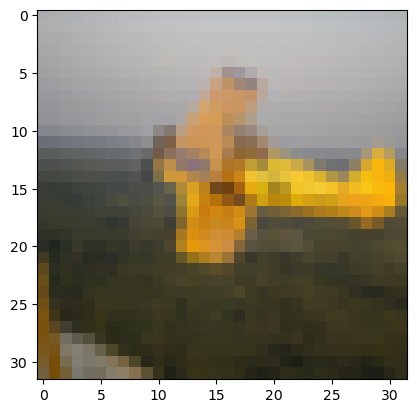

In [63]:
plt.imshow(X_train_scale[1234])

In [64]:
y_train[1234]

array([0], dtype=uint8)

In [65]:
namelist[0]

'Aeroplane'

# Second predication

In [66]:
X_test_scale[1234]

array([[[0.90980392, 0.90980392, 0.90980392],
        [0.89411765, 0.89411765, 0.89019608],
        [0.89411765, 0.89803922, 0.89019608],
        ...,
        [0.88235294, 0.89411765, 0.89411765],
        [0.88627451, 0.89411765, 0.89803922],
        [0.89803922, 0.89803922, 0.89803922]],

       [[0.91764706, 0.91764706, 0.91372549],
        [0.86666667, 0.86666667, 0.85098039],
        [0.84705882, 0.85098039, 0.82745098],
        ...,
        [0.84705882, 0.85490196, 0.83529412],
        [0.84313725, 0.85098039, 0.83529412],
        [0.87843137, 0.87843137, 0.8745098 ]],

       [[0.88235294, 0.88627451, 0.87843137],
        [0.76470588, 0.76470588, 0.73333333],
        [0.72156863, 0.71764706, 0.67843137],
        ...,
        [0.72156863, 0.69803922, 0.62352941],
        [0.6745098 , 0.65490196, 0.59215686],
        [0.78431373, 0.78039216, 0.77647059]],

       ...,

       [[0.82745098, 0.83137255, 0.81960784],
        [0.48235294, 0.49019608, 0.45098039],
        [0.35686275, 0

In [67]:
X_test_scale.shape

(10000, 32, 32, 3)

In [68]:
X_test_scale[1234]

array([[[0.90980392, 0.90980392, 0.90980392],
        [0.89411765, 0.89411765, 0.89019608],
        [0.89411765, 0.89803922, 0.89019608],
        ...,
        [0.88235294, 0.89411765, 0.89411765],
        [0.88627451, 0.89411765, 0.89803922],
        [0.89803922, 0.89803922, 0.89803922]],

       [[0.91764706, 0.91764706, 0.91372549],
        [0.86666667, 0.86666667, 0.85098039],
        [0.84705882, 0.85098039, 0.82745098],
        ...,
        [0.84705882, 0.85490196, 0.83529412],
        [0.84313725, 0.85098039, 0.83529412],
        [0.87843137, 0.87843137, 0.8745098 ]],

       [[0.88235294, 0.88627451, 0.87843137],
        [0.76470588, 0.76470588, 0.73333333],
        [0.72156863, 0.71764706, 0.67843137],
        ...,
        [0.72156863, 0.69803922, 0.62352941],
        [0.6745098 , 0.65490196, 0.59215686],
        [0.78431373, 0.78039216, 0.77647059]],

       ...,

       [[0.82745098, 0.83137255, 0.81960784],
        [0.48235294, 0.49019608, 0.45098039],
        [0.35686275, 0

In [69]:
img1=X_test_scale[1234].reshape((1,)+X_test_scale[1234].shape)

In [70]:
img1

array([[[[0.90980392, 0.90980392, 0.90980392],
         [0.89411765, 0.89411765, 0.89019608],
         [0.89411765, 0.89803922, 0.89019608],
         ...,
         [0.88235294, 0.89411765, 0.89411765],
         [0.88627451, 0.89411765, 0.89803922],
         [0.89803922, 0.89803922, 0.89803922]],

        [[0.91764706, 0.91764706, 0.91372549],
         [0.86666667, 0.86666667, 0.85098039],
         [0.84705882, 0.85098039, 0.82745098],
         ...,
         [0.84705882, 0.85490196, 0.83529412],
         [0.84313725, 0.85098039, 0.83529412],
         [0.87843137, 0.87843137, 0.8745098 ]],

        [[0.88235294, 0.88627451, 0.87843137],
         [0.76470588, 0.76470588, 0.73333333],
         [0.72156863, 0.71764706, 0.67843137],
         ...,
         [0.72156863, 0.69803922, 0.62352941],
         [0.6745098 , 0.65490196, 0.59215686],
         [0.78431373, 0.78039216, 0.77647059]],

        ...,

        [[0.82745098, 0.83137255, 0.81960784],
         [0.48235294, 0.49019608, 0.45098039]

In [71]:
img1.shape

(1, 32, 32, 3)

In [72]:
fun_model.predict(img1)

1/1 [==============================] - 0s 24ms/step


array([[2.5475504e-07, 8.9717841e-01, 4.5200954e-10, 1.0763514e-11,
        1.2871796e-08, 7.5303028e-11, 1.0029073e-09, 6.8280215e-11,
        4.4586908e-05, 1.0277670e-01]], dtype=float32)

In [73]:
np.argmax(fun_model.predict(img1))

1/1 [==============================] - 0s 15ms/step


1

In [74]:
y_test[1234]

array([1], dtype=uint8)

In [76]:
namelist[1]

'automobile'

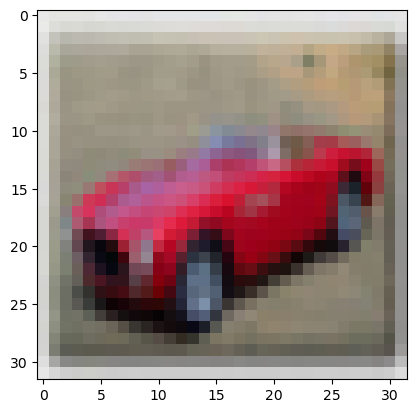

In [77]:
plt.imshow(X_test_scale[1234])